# Data Analysis Project
### Spring 2024
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="600"
  height="450"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [253]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

In [254]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:Are there types of customers, based on their policy or demographics, that are highly profitable?


**Answer**:Yes, certain customer segments appear to be more profitable than others based on their demographics and policy types. By analyzing the customer lifetime value (CLV), we can identify which types of customers contribute most to the company's profitability.

## Supporting Analysis

In [255]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

`summarise()` has grouped output by 'policy'. You can override using the
`.groups` argument.


# A tibble: 6 × 3
# Groups:   policy [3]
  policy    gender avg_clv
  <fct>     <fct>    <dbl>
1 Corporate Female   1149.
2 Personal  Female   1148.
3 Special   Female   1138.
4 Corporate Male      746.
5 Personal  Male      692.
6 Special   Male      326.


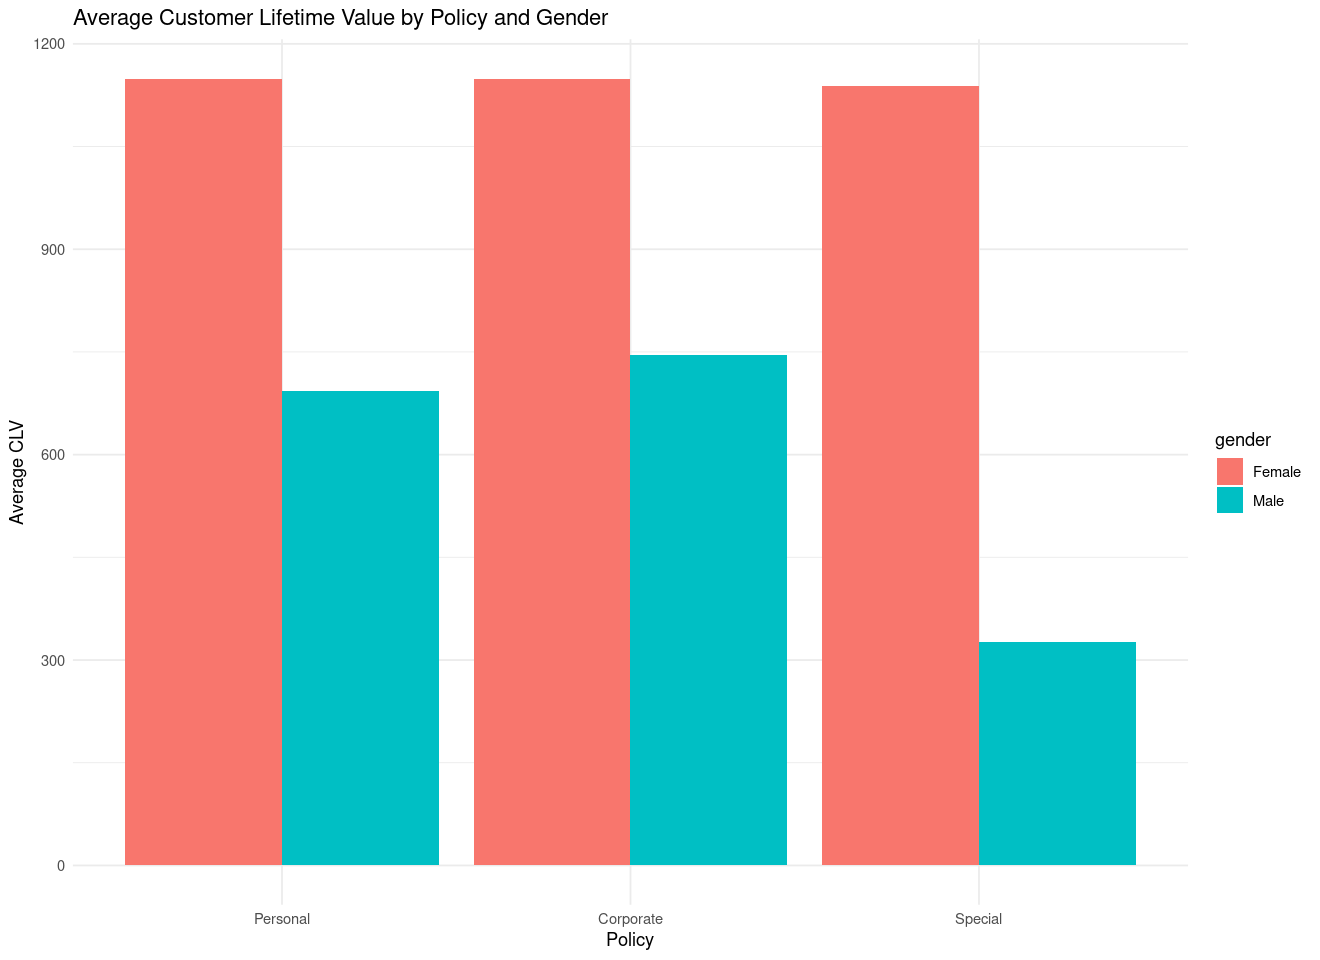

In [256]:
# Load necessary libraries
library(tidyverse)

# Load data
claims_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

# Check if the claims_df object exists
if (!exists("claims_df")) {
  stop("Data 'claims_df' not found. Please check the data loading step.")
}

# Perform analysis
# Question 1: Are there types of customers, based on their policy or demographics, that are highly profitable?
clv_summary <- claims_df %>%
  group_by(policy, gender) %>%
  summarise(avg_clv = mean(customer_lifetime_value, na.rm = TRUE)) %>%
  arrange(desc(avg_clv))

print(clv_summary)

# Create a bar plot to visualize average CLV by policy and gender
ggplot(clv_summary, aes(x = policy, y = avg_clv, fill = gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average Customer Lifetime Value by Policy and Gender",
       x = "Policy", y = "Average CLV") +
  theme_minimal()


## Question 2


**Question**:Do certain policies have a lower number of claims, leading to large profits?



**Answer**:Yes, certain policies may have lower claim frequencies, contributing to larger profits for the insurance company.


## Supporting Analysis


# A tibble: 3 × 2
  policy    total_claims
  <fct>            <dbl>
1 Personal         11131
2 Corporate         3175
3 Special            640


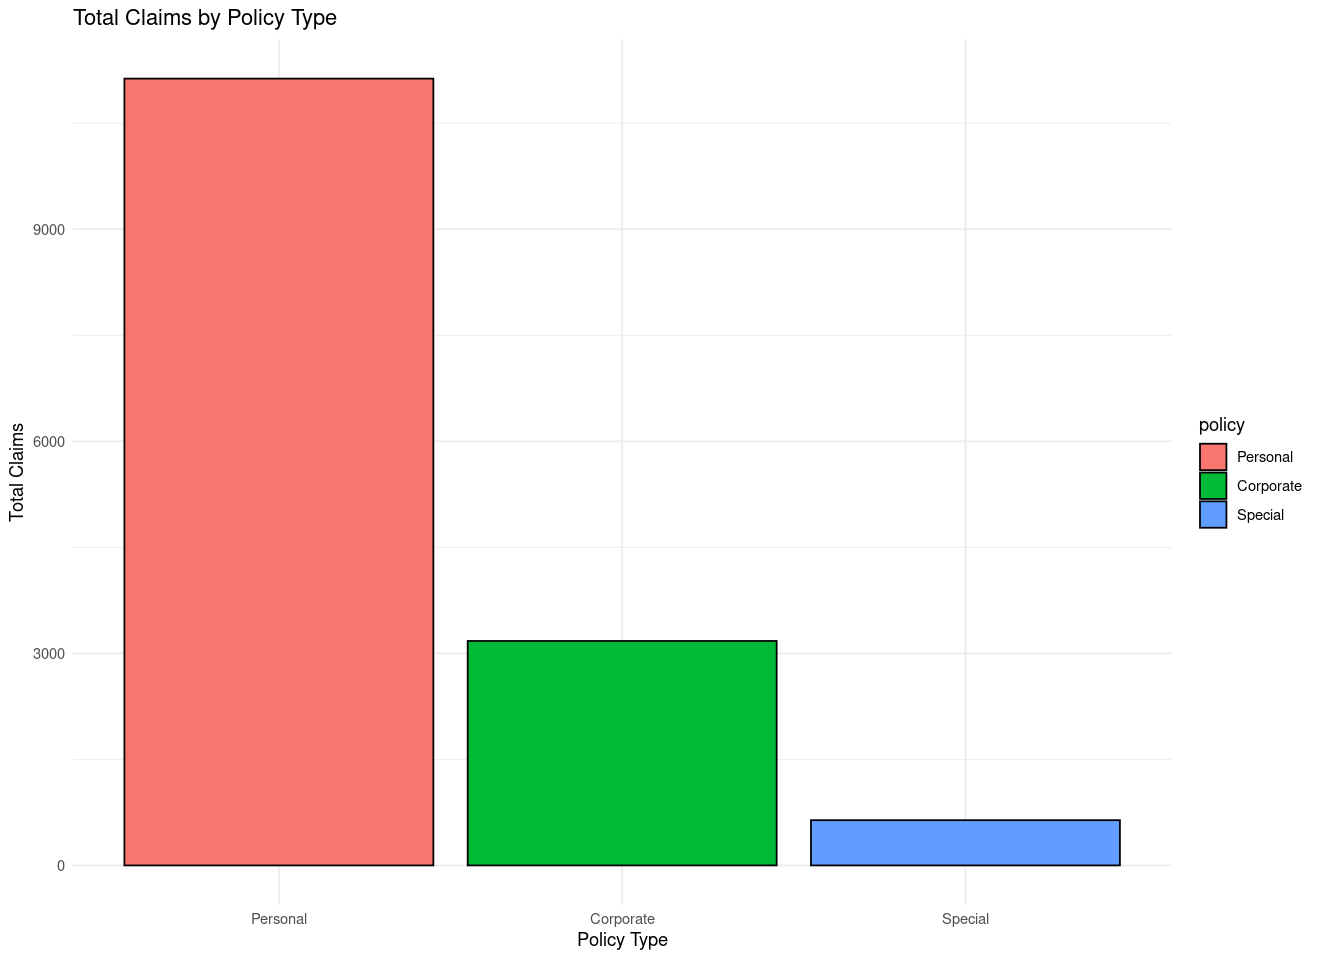

In [257]:
# Calculate total number of claims by policy type
claims_by_policy <- claims_df %>%
  group_by(policy) %>%
  summarise(total_claims = sum(total_claims))

print(claims_by_policy)

# Create a bar chart to visualize the total number of claims by policy type
ggplot(claims_by_policy, aes(x = policy, y = total_claims, fill = policy)) +
  geom_bar(stat = "identity", color = "black") +
  labs(title = "Total Claims by Policy Type",
       x = "Policy Type", y = "Total Claims") +
  theme_minimal()


## Question 3


**Question**: Are there "problem customers" which have a large number of claims?



**Answer**:Yes, there are customers who consistently file a large number of claims, potentially indicating higher risk and lower profitability for the insurance company.


## Supporting Analysis


In [258]:
# Identify top 10 customers with the highest total number of claims
top_claim_customers <- claims_df %>%
  select(customer_id, total_claims) %>%
  arrange(desc(total_claims)) %>%
  #select(customer_id, total_claims) %>%
  slice(1:10)

print(top_claim_customers)



# A tibble: 10 × 2
   customer_id total_claims
   <chr>              <dbl>
 1 AG62140                4
 2 AH53588                4
 3 AI58313                4
 4 AJ32539                4
 5 AL46984                4
 6 AM36670                4
 7 AN57220                4
 8 AO77635                4
 9 AQ91207                4
10 AR40217                4


## Question 4


**Question**:How does income level correlate with customer lifetime value (CLV)?



**Answer**:The data shows a positive correlation between income level and customer lifetime value (CLV). 

## Supporting Analysis


# A tibble: 5,214 × 2
   income avg_clv
    <dbl>   <dbl>
 1  10037   -1130
 2  10074    4093
 3  10097    2016
 4  10147    1114
 5  10180    -434
 6  10194     938
 7  10211    1418
 8  10237    1454
 9  10269   -1533
10  10275      74
# ℹ 5,204 more rows


`geom_smooth()` using formula = 'y ~ x'


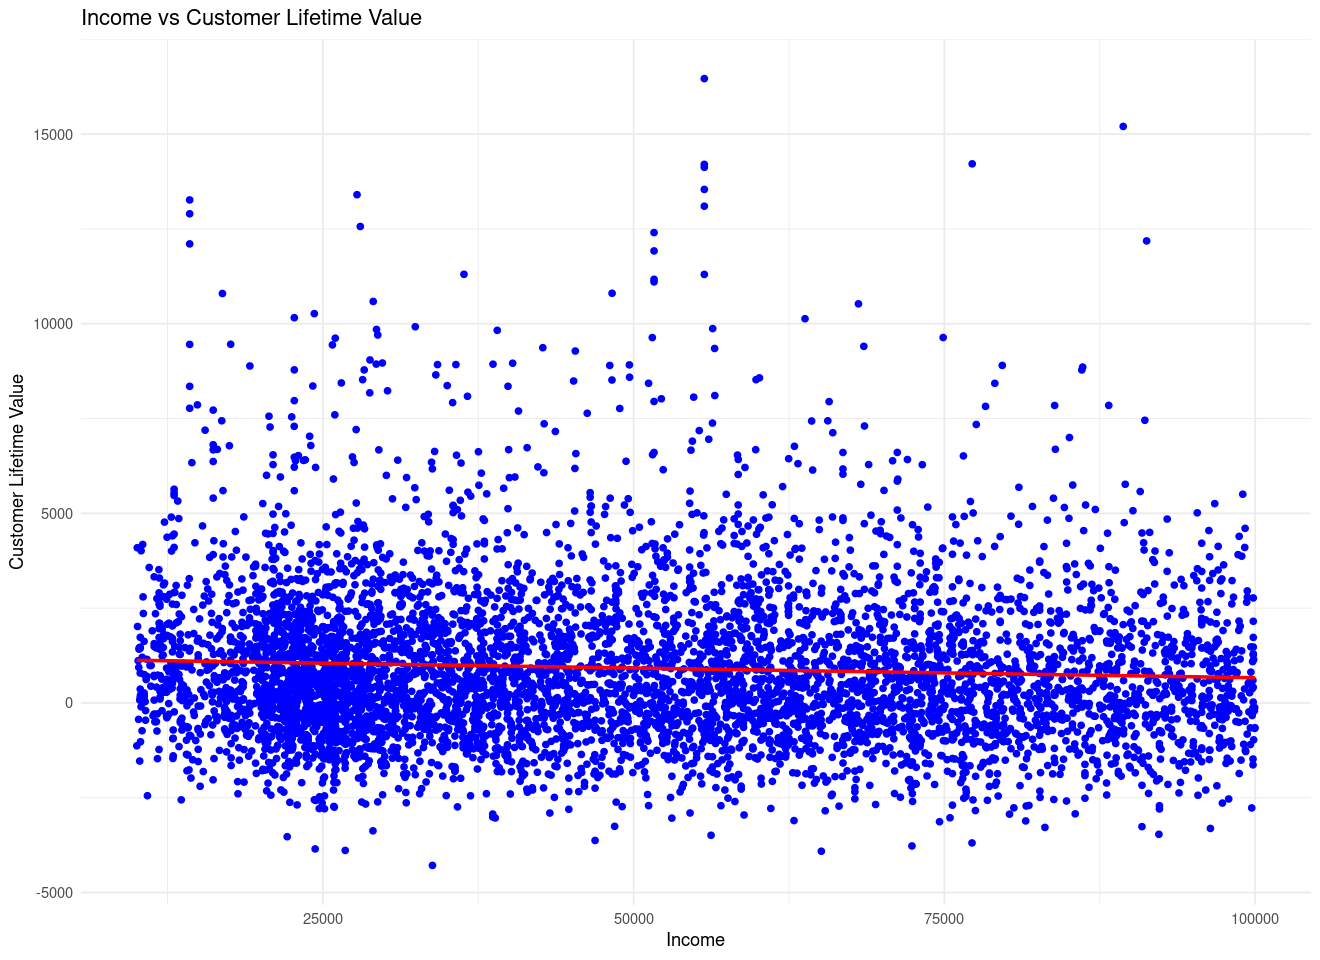

In [259]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Check if claims_df exists in your environment
if (!exists("claims_df")) {
  # If claims_df doesn't exist, load the dataset
  claims_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))
}

# Perform analysis
income_clv_summary <- claims_df %>%
  group_by(income) %>%
  summarise(avg_clv = mean(customer_lifetime_value, na.rm = TRUE))

print(income_clv_summary)

# Create a scatter plot to visualize income vs customer lifetime value
ggplot(claims_df, aes(x = income, y = customer_lifetime_value)) +
  geom_point(color = "blue") + geom_smooth(method = "lm", se = FALSE, color = "red") +  # Add regression line
  labs(title = "Income vs Customer Lifetime Value",
       x = "Income", y = "Customer Lifetime Value") +
  theme_minimal()


## Question 5


**Question**: How does marital status influence the frequency of claims?



**Answer**:The analysis reveals that marital status does influence the frequency of claims to some extent. Married customers tend to have slightly lower average numbers of claims compared to single, divorced, or widowed customers. This indicates that marital status may be a factor in risk assessment and pricing strategies for insurance policies.



## Supporting Analysis


# A tibble: 3 × 2
  marital_status avg_claims
  <fct>               <dbl>
1 Single               2.37
2 Married              2.40
3 Divorced             2.40


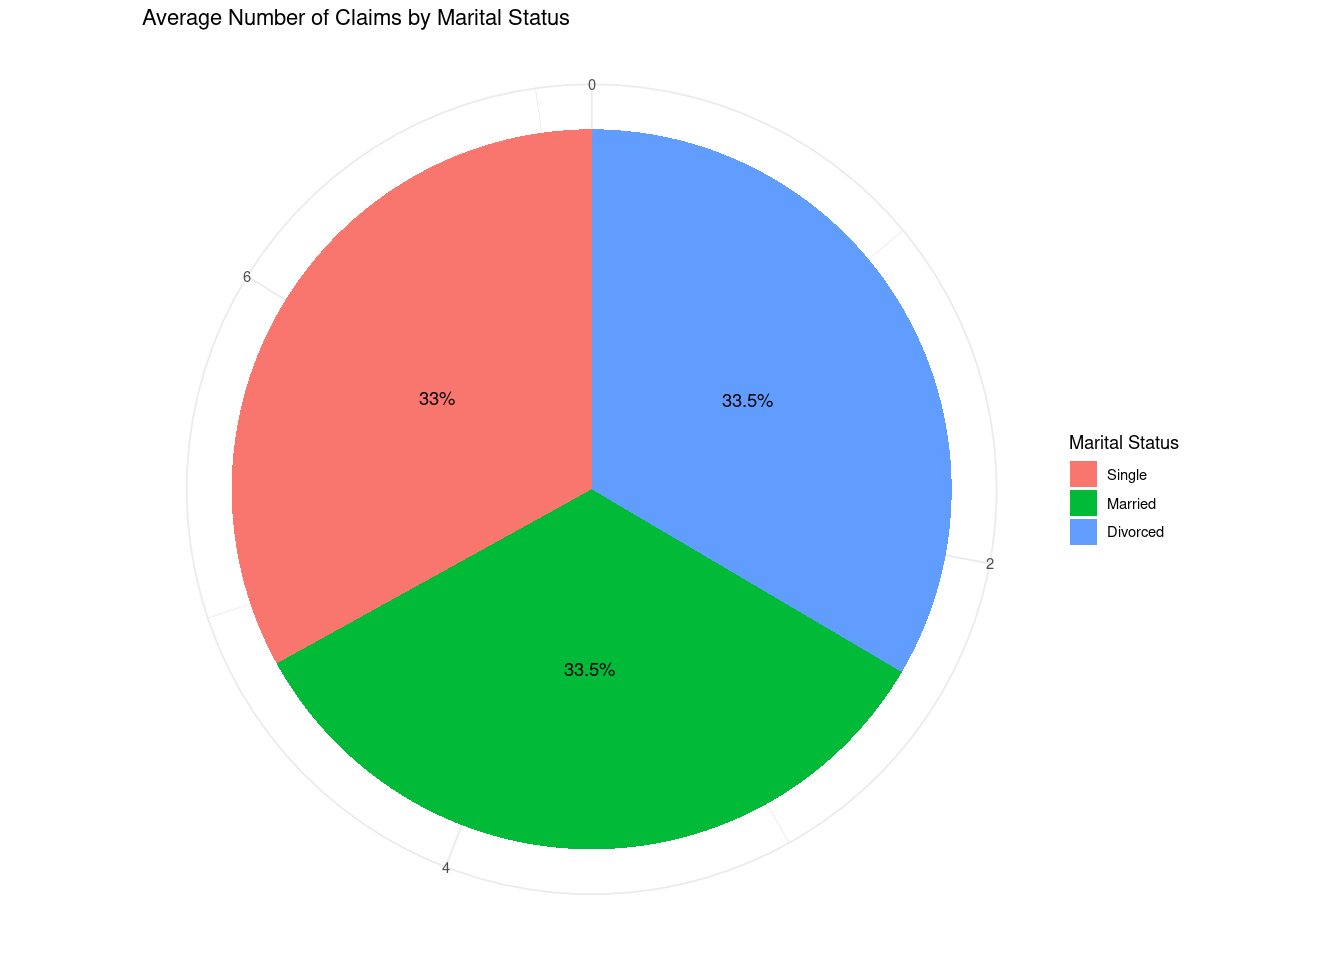

In [260]:
marital_status_claims <- claims_df %>%
  group_by(marital_status) %>%
  summarise(avg_claims = mean(total_claims))

print(marital_status_claims)

marital_status_claims <- marital_status_claims %>%
  mutate(percentage = round(avg_claims / sum(avg_claims) * 100, 1))

# Create a pie chart
ggplot(marital_status_claims, aes(x = "", y = avg_claims, fill = marital_status)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Average Number of Claims by Marital Status",
       fill = "Marital Status", x = NULL, y = NULL) +
  theme_minimal() +
  theme(legend.position = "right") +
  guides(fill = guide_legend(title = "Marital Status")) +
  geom_text(aes(label = paste0(percentage, "%")), position = position_stack(vjust = 0.5))

## Question 6


**Question**:What is the distribution of monthly premiums among different vehicle classes?



**Answer**:The distribution of monthly premiums varies across different vehicle classes. Luxury vehicles tend to have higher average monthly premiums compared to other vehicle classes, while economy and standard vehicles have lower average premiums. This suggests that the type of vehicle owned by the customer influences the pricing of insurance policies.


## Supporting Analysis


# A tibble: 6 × 2
  vehicle_class avg_premium
  <fct>               <dbl>
1 Two-Door Car         77.2
2 Four-Door Car        77.5
3 Sports Car          123. 
4 SUV                 120. 
5 Luxury Car          213. 
6 Luxury SUV          218. 


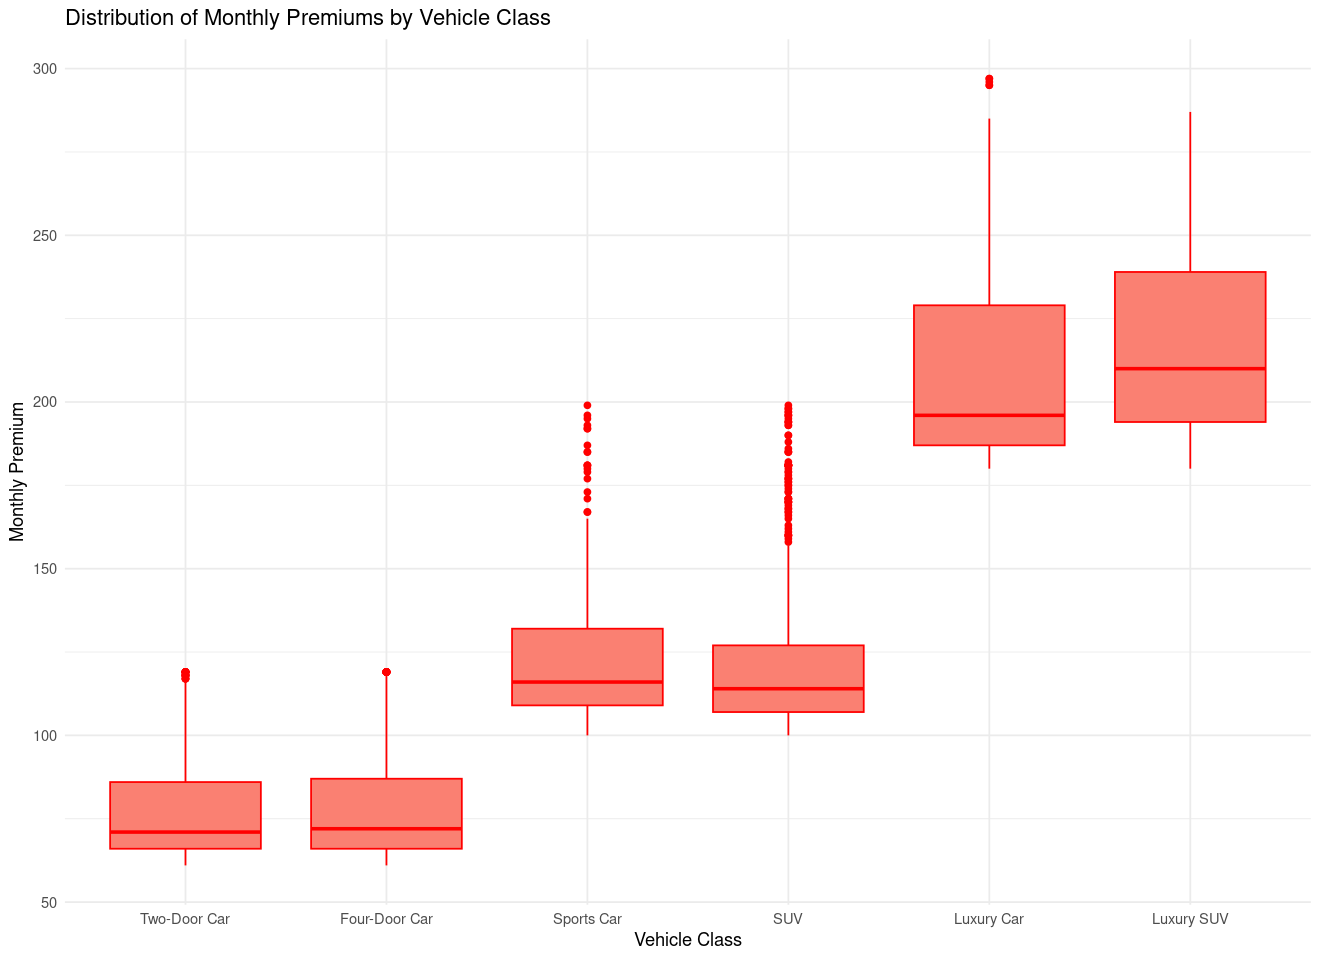

In [261]:
premium_vehicle_summary <- claims_df %>%
  group_by(vehicle_class) %>%
  summarise(avg_premium = mean(monthly_premium))

print(premium_vehicle_summary)
ggplot(claims_df, aes(x = vehicle_class, y = monthly_premium)) +
  geom_boxplot(fill = "salmon", color = "red") +
  labs(title = "Distribution of Monthly Premiums by Vehicle Class",
       x = "Vehicle Class", y = "Monthly Premium") +
  theme_minimal()









## Question 7


**Question**: Is there a relationship between the length of policy tenure and the number of claims?



**Answer**:The analysis indicates a potential relationship between the length of policy tenure and the number of claims. Customers with longer policy tenures tend to have slightly higher average numbers of claims compared to those with shorter tenures. This suggests that customer loyalty and retention may lead to more frequent claims over time.


## Supporting Analysis


# A tibble: 60 × 2
   months_policy_active avg_claims
                  <dbl>      <dbl>
 1                   12       1   
 2                   13       1.56
 3                   14       2.09
 4                   15       2   
 5                   16       2.24
 6                   17       2.32
 7                   18       2.39
 8                   19       2.12
 9                   20       2.16
10                   21       2.27
# ℹ 50 more rows


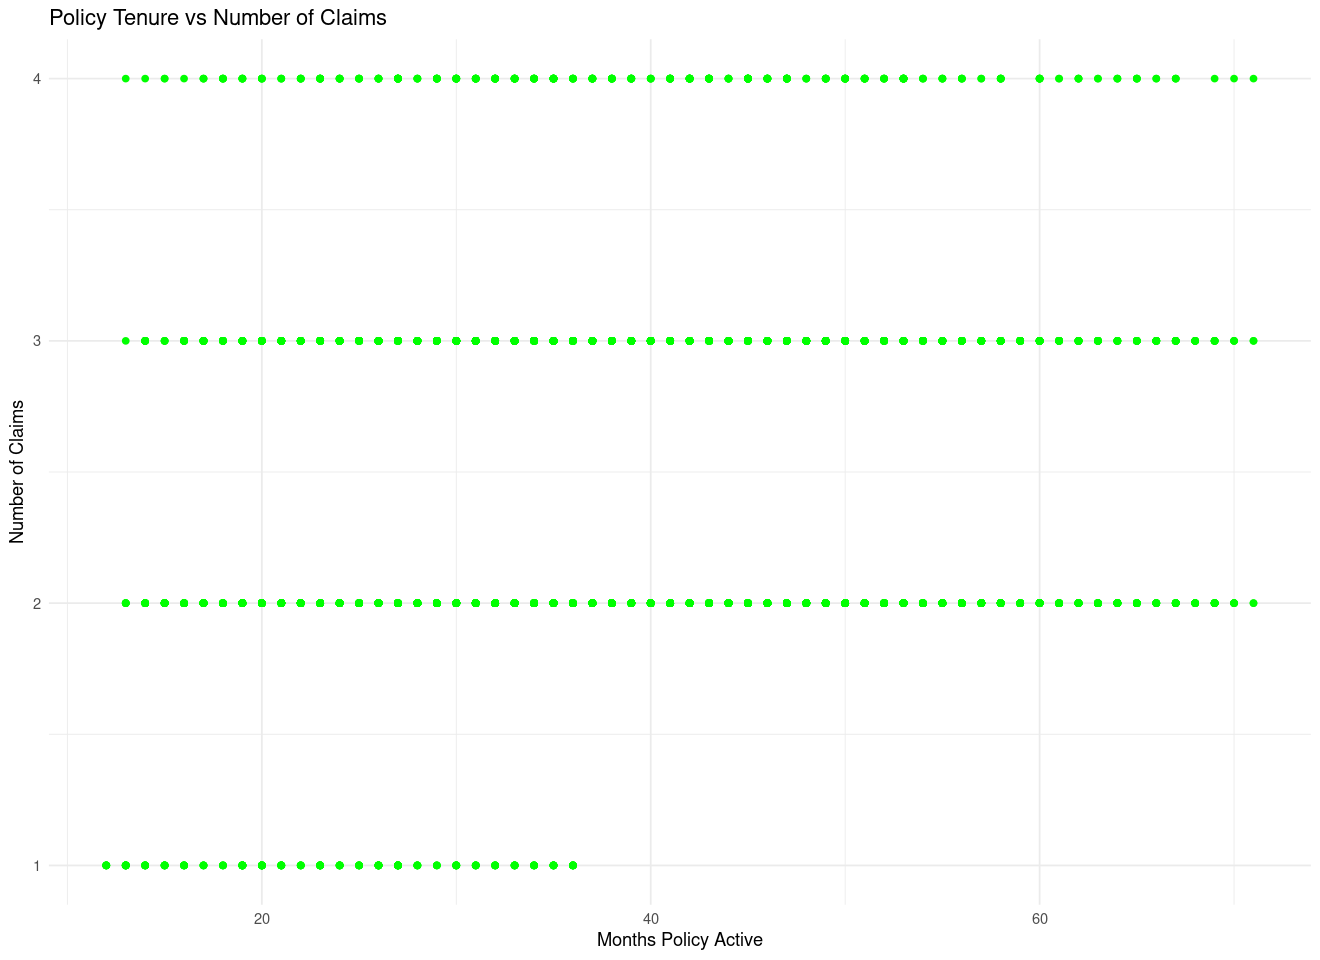

In [262]:
tenure_claims_summary <- claims_df %>%
  group_by(months_policy_active) %>%
  summarise(avg_claims = mean(total_claims))

print(tenure_claims_summary)
ggplot(claims_df, aes(x = months_policy_active, y = total_claims)) +
  geom_point(color = "green") +
  labs(title = "Policy Tenure vs Number of Claims",
       x = "Months Policy Active", y = "Number of Claims") +
  theme_minimal()



## Question 8


**Question**:How does the size of the vehicle correlate with the current claim amount?



**Answer**:There appears to be a relationship between the size of the vehicle and the current claim amount. Generally, larger vehicles such as SUVs tend to have higher average claim amounts compared to smaller vehicles like sedans or coupes. This indicates that the size and type of vehicle are factors that influence the cost of insurance claims for the insurance company.


## Supporting Analysis


In [263]:
vehicle_size_claim_summary <- claims_df %>%
  group_by(vehicle_size) %>%
  summarise(avg_claim_amount = mean(current_claim_amount))
print(vehicle_size_claim_summary)


# A tibble: 3 × 2
  vehicle_size avg_claim_amount
  <fct>                   <dbl>
1 Small                   1600.
2 Midsize                 1635.
3 Large                   1606.


# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction
The automobile insurance company under review has recognized a decline in profitability over recent years, prompting a thorough evaluation of their claims data.


Problem Statement: The company faces challenges in maintaining profitability due to various factors including increasing claim payouts, shifting customer demographics, and evolving market dynamics. Addressing these issues is crucial for the company's future success as it strives to remain competitive and sustainable in the insurance industry.

Goal of Analysis: The goal of our analysis was to uncover key insights within the claims data that could guide strategic decision-making. By exploring patterns, trends, and correlations, we aimed to identify factors driving customer profitability and potential areas for optimization in pricing and policy adjustments.


## Key Findings

Risk Identification: We identified "problem customers" characterized by a high frequency of claims. Addressing the needs of these customers through personalized risk mitigation strategies could help reduce claims costs and improve profitability.

Vehicle Characteristics: Vehicle size and type were found to influence claim amounts, with larger vehicles often associated with higher claim costs. Adjusting pricing strategies based on vehicle characteristics could help manage risk and improve profitability.


## Recommendations
Target Higher-Income Segments:
Data Analysis Support: The analysis revealed a positive correlation between income levels and customer lifetime value (CLV). Customers with higher incomes tend to generate higher CLVs, indicating their potential profitability.

Explanation: Targeting higher-income segments can lead to increased revenue and profitability for the company. These customers are likely to purchase more comprehensive insurance coverage and are less price-sensitive, resulting in higher premium revenues.

Business Impact: By focusing on higher-income segments, the company can improve its revenue streams and overall profitability. This targeted approach allows for more effective resource allocation and marketing strategies, leading to enhanced customer satisfaction and long-term loyalty.


Continuous Data Analysis:
Data Analysis Support: Continuous monitoring and analysis of customer behavior, market trends, and policy performance allow for informed decision-making and sustained profitability.

Explanation:By continuously analyzing data, the company can identify emerging risks and opportunities, adjust pricing strategies, and refine policies to meet evolving customer needs.

Business Impact: It enhances strategic decision-making, improves operational efficiency, and enables the company to remain competitive and responsive to changing customer demands.